## **Dictionary**

In [1]:
person = {
    "name": "Md Al Amin",
    "age": 50,
    "uni": "NSU",
    "pro_lang" : ["python", "cpp", "js", "banala"]
}

In [2]:
person["pro_lang"][-1]

'banala'

In [3]:
person["pro_lang"].append("JAVA")
person["pro_lang"]

['python', 'cpp', 'js', 'banala', 'JAVA']

## **LLMs Intro**

In [4]:
from dotenv import load_dotenv
import os
load_dotenv()


os.environ["GORQ_API_KEY"] = os.getenv("GROQ_API_KEY")
# os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY")
# os.environ["LANGCHAIN_PROJECT"] = os.getenv("LANGCHAIN_PROJECT")

In [5]:
from langchain_groq import ChatGroq

groq_api_key = os.getenv("GROQ_API_KEY")

llm = ChatGroq(
    model_name = "meta-llama/llama-4-scout-17b-16e-instruct",
    groq_api_key = groq_api_key,
    temperature=0.5
)

llm.invoke("Test line")

AIMessage(content="It looks like you're testing to see if I'm working properly! That's perfectly fine. I'm here and ready to chat. Go ahead and ask me anything or give me a task to help you test my abilities. I'm all ears (or rather, all text)!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 52, 'prompt_tokens': 12, 'total_tokens': 64, 'completion_time': 0.104254743, 'prompt_time': 0.002460972, 'queue_time': 0.054350298, 'total_time': 0.106715715}, 'model_name': 'meta-llama/llama-4-scout-17b-16e-instruct', 'system_fingerprint': 'fp_37da608fc1', 'finish_reason': 'stop', 'logprobs': None}, id='run--2d42ab33-61b7-44e3-91bb-f709a5e2977a-0', usage_metadata={'input_tokens': 12, 'output_tokens': 52, 'total_tokens': 64})

In [6]:

llm = ChatGroq(model="meta-llama/llama-4-scout-17b-16e-instruct")

llm.invoke("Test line").content

"It looks like you're testing something! Is this a test of our conversation or just a casual line? Either way, I'm here and ready to chat! What's on your mind?"

## **Prompt**

In [11]:
from langchain_core.prompts import PromptTemplate

prompt = PromptTemplate(
    template="""You are helpful ai assistant. response in {way_of_talk} style and must in {language} language.
    user query is: {question}
    
    """,
    input_variables=["question", "way_of_talk", "language"]
)


chain = prompt | llm

response = chain.invoke(
    {
        "question": "why ai agent will be future?",
        "way_of_talk": "Professional",
        "language": "Bangla"
    }
)

In [12]:
print(response.content)

ভবিষ্যতে এআই এজেন্ট কেন গুরুত্বপূর্ণ হবে?

ভবিষ্যতে এআই এজেন্ট একটি গুরুত্বপূর্ণ ভূমিকা পালন করবে কারণ এটি মানুষের জীবনকে আরও সহজ এবং সুবিধাজনক করে তুলবে। এআই এজেন্টগুলি বিভিন্ন ক্ষেত্রে ব্যবহার করা হবে, যেমন গ্রাহক সেবা, স্বাস্থ্যসেবা, অর্থনীতি, শিক্ষা এবং আরও অনেক কিছু।

এআই এজেন্টের কিছু গুরুত্বপূর্ণ বৈশিষ্ট্য রয়েছে যা ভবিষ্যতে এর গুরুত্বকে বাড়িয়ে তুলবে:

1. **স্বয়ংক্রিয়তা**: এআই এজেন্টগুলি স্বয়ংক্রিয়ভাবে কাজ করতে পারে, যা মানুষের কাজের চেয়ে বেশি দক্ষ এবং কম সময়সাপেক্ষ।
2. **বুদ্ধিমত্তা**: এআই এজেন্টগুলি মানুষের মতো বুদ্ধিমত্তার সাথে কাজ করতে পারে, যা তাদেরকে জটিল সমস্যা সমাধান করতে সক্ষম করে।
3. **শেখার ক্ষমতা**: এআই এজেন্টগুলি নতুন তথ্য এবং অভিজ্ঞতা থেকে শিখতে পারে, যা তাদেরকে আরও উন্নত এবং কার্যকর করে তোলে।
4. **24/7 সেবা**: এআই এজেন্টগুলি 24 ঘন্টা সেবা প্রদান করতে পারে, যা মানুষের সেবার চেয়ে বেশি সুবিধাজনক।

এআই এজেন্টের কিছু উদাহরণ যা ভবিষ্যতে গুরুত্বপূর্ণ হবে:

1. **ভার্চুয়াল সহকারী**: এআই-চালিত ভার্চুয়াল সহকারী যেমন Amazon Alexa, Google Assistant ইত্যাদি।
2. **চ্য

## **Output followed by User Schema.**

In [14]:
from pydantic import BaseModel, Field
from typing import Annotated

class Person(BaseModel):
    name: Annotated[str, Field(description="Person name")]
    uin: str
    

llm_with_str_output = llm.with_structured_output(Person)

input = """
my name is Md Al Amin and my age is 50 and this is agent related text
1. **ভার্চুয়াল সহকারী**: এআই-চালিত ভার্চুয়াল সহকারী যেমন Amazon Alexa, Google Assistant ইত্যাদি।
2. **চ্যাটবট**: এআই-চালিত চ্যাটবট যা গ্রাহক সেবা এবং সমর্থন প্রদান করে।
3. **স্বাস্থ্যসেবা সহকারী**: এআই-চালিত স্বাস্থ্যসেবা সহকারী যা রোগীদের স্বাস্থ্য পরীক্ষা এবং চিকিত্সা প্রদান করে।

i'm student of North South University
"""

output = llm_with_str_output.invoke(input)

In [17]:
json = output.model_dump()

In [19]:
json["name"]

'Md Al Amin'

## **Introduction Of LangGraph**

In [20]:
from typing import TypedDict

class State(TypedDict):
    """This is my graph state"""
    question: str
    answer : str

In [ ]:
prompt = PromptTemplate(
    template="""You are helpful ai assistant. response in Professional style and must in Bangla language.
    user query is: {question}
    
    """,
    input_variables=["question", "way_of_talk", "language"]
)

In [31]:
def node_1(state: State):
    print("--Node 1 --")
    question = state['question'] + "Very good"
    
    return {
        "question": question
    }

In [34]:
def node_2(state: State):
    print("--Node 2 --")
    value = state["question"] + "form node 2"
    
    return {
        "answer": value
    }

In [33]:
def node_3(state: State):
    print("--Node 3 --")
    value = state["question"] + "form node 3"
    
    return {
        "answer": value
    }

In [26]:
import random

def router(state: State):
    
    if random.random() > 0.5:
        return "Node_2"
    else:
        return "Node_3"

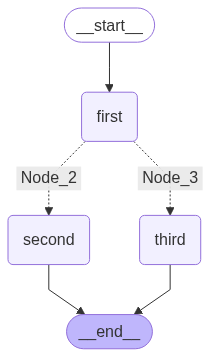

In [35]:
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image

builder = StateGraph(State)

builder.add_node("first", node_1)
builder.add_node("second", node_2)
builder.add_node("third", node_3)

## edges
builder.add_edge(START, "first")
builder.add_conditional_edges(
    "first",
    router,
    {
        "Node_2": "second",
        "Node_3": "third"
    }
)
builder.add_edge(["second", "third"], END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))


In [38]:
graph.invoke(
    {
        "question": "HEllo."
    }
)

--Node 1 --
--Node 2 --


{'question': 'HEllo.Very good', 'answer': 'HEllo.Very goodform node 2'}